# Divison del DataSet
En este notebook se muetsran algunos de los mecanismos mas utilizados para la division del DataSet
# DataSet 

### Descripcion

ISCX NSL-KDD 2009 dataset

Sorry, this data set is no longer available.

ISCX NSL-KDD is a suggested data set for solving some of the inherent KDD'99 data set problems mentioned in [1]. While this new version of the KDD dataset still presents some of the problems mentioned by McHugh and might not be a perfect representation of existing real networks, due to the lack of public datasets for network-based intrusion detection systems (IDS), we believe it can still be applied as an effective reference dataset to help researchers compare different methods of intrusion detection.

In addition, the number of records in NSL-KDD training and testing sets is reasonable. This advantage allows to execute the experiments in the entire set without the need to randomly select a small portion. Consequently, the results of the evaluations of different researches will be consistent and comparable.

### Data files

* <span style="color:green">KDDTrain+. ARFF : The complete set of NSL-KDD trains with binary tags in ARFF format</span>
* KDDTrain+. TXT : The full set of NSL-KDD trains, including attack type tags and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF : a 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT : a 20% subset of the KDDTrain+.txt file
* KDDTest+. ARFF : The complete NSL-KDD test set with binary tags in ARFF format
* KDDTest+. TXT : The full set of NSL-KDD tests, including attack type tags and difficulty level in CSV format
* KDDTest-21. ARFF : A subset of the KDDTest+.arff file that does not include records with a difficulty level of 21 out of 21
* KDDTest-21. TXT : A subset of the KDDTest+.txt file that does not include records with a difficulty level of 21 of 21

Improvements to the KDD'99 dataset

The ISCX NSL-KDD data set has the following advantages over the original KDD data set:

    It does not include redundant records in the training set, so classifiers will not be biased to more frequent records.
    There are no duplicate records in the proposed test sets; therefore, student performance is not biased by methods that have better detection rates in frequent records.
    The number of records selected from each difficulty level group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of the different machine learning methods vary over a wider range, which facilitates an accurate assessment of the different learning techniques.
    The number of records in the training and testing sets is reasonable, allowing experiments to be performed in the entire set without the need to randomly select a small portion. Consequently, the results of the evaluations of different researches will be consistent and comparable.

Statistical observations

One of the most important shortcomings of the KDD dataset is the large number of redundant records, which causes learning algorithms to be skewed into frequent records, preventing them from learning infrequent records, which are usually more damaging to networks, such as U2R and R2L attacks. In addition, the presence of these repeated records in the test set will cause the evaluation results to be biased by methods with improved frequent record detection rates.

In addition, we analyze the difficulty level of the KDD data set records. Surprisingly, approximately 98% of the training set records and 86% of those in the test set were correctly classified with the 21 students.
To perform our experiments, we randomly created three smaller subsets of the KDD training set, each with fifty thousand information records. Each apprentice was trained with the training sets created. Subsequently, we used the 21 learned machines (7 learners, each trained three times) to label the records of the entire KDD training and test set, which provided us with 21 predicted labels for each record. In addition, we write down each record of the data set with a value #successfulPrediction , initialized to zero. Since the KDD dataset provides the correct label for each record, we compare the predicted label of each record, provided by a specific learner, with the actual label, increasing #successfulPrediction in one if there was a coincidence. Through this process, we calculated the number of learners who were able to correctly label that record. The highest value of #successfulPrediction It is 21, indicating that all learners were able to correctly predict the label of that record.
Redundant record statistics in the KDD training set

Original records | Different records | Reduction rate

    Attacks: 3.925.650 | 262.178 | 93.32%
    Normal: 972.781 | 812.814 | 16.44%
    Total: 4.898.431 | 1.074.992 | 78.05%

Redundant record statistics in the KDD test set

Original records | Different records | Reduction rate

    Attacks: 250.436 | 29,378 | 88.26%
    Normal: 60.591 | 47.911 | 20.92%
    Total: 311.027 | 77.289 | 75.15%
License

You can redistribute, republish, and replicate the ISCX dataset NSL-KDD in any format. However, any use or redistribution of data should include an appointment of the data set NSL-KDD and of the article mentioned below.

References: [1] M. Tavallaee, E. Bagheri, W. Lu and A. Ghorbani, “ A detailed analysis of the KDD CUP 99 data set "," sent to the Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA) , 2009.

[URL](https://www-unb-ca.translate.goog/cic/datasets/nsl.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc)

## 1.- Lectura del DataSet

In [10]:
import arff
import pandas as pd

In [11]:
def load_kdd_dataset(data_path):
    """Lectura del DataSet NSL-KDD"""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
        attributes = [attr[0] for attr in dataset["attributes"]]
        return pd.DataFrame(dataset["data"], columns=attributes)

In [12]:
df = load_kdd_dataset("/home/janeth/Simulacion/datasets/datasets/NSL-KDD/KDDTrain+.arff")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## 2.- Division del DataSet

Se debe separar el DataSet en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validacion y pruebas. Sklear implementa la funcion **split_train_test**

In [14]:
#Separar el DataSet60% train set, 40 test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [17]:
# Separar el DataSet de pruebas 50% validation set, 50% test set
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [18]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validacion Set:", len(val_set))
print("Longitud del Train Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validacion Set: 25195
Longitud del Train Set: 25195


### 3.- Particionado Aleatorio y Stratified Sampling

Sklearn implementa la funcion **train_test_split**, sin embargo esta funcion por defecto realiza un particionado del DataSet aleatorio para cada vez que se ejecuta el script. Aun añadiendo una semilla fija y aleatoria, cada vez que se cargue de nuevo el dataset se generan nuevos subconjuntos esto puede ocacionar que despues de muchos intentos el algoritmo "vea" todo el DataSet

Para solucionar este problema sklearn ha introducido el parametro **shuffle** en la funcion **train_test_split**.

In [ ]:
# Si shuffle = falso, el dataset no mezclara antes del particionado
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

Estos metodos para dividir el DataSet estan bien si se tiene un conjunto de datos muy grande pero si no se tiene, se corre el riesgo de introducir **Sampling Bias**

Para evitar esto s eutiliza un metodo de sampling que se llama **Stratified Sampling**. La poblacion dividida en subconjuntos homogeneos llamados **strata**. El objetivo es que no quede ninguna caracteristica del DataSet sin representacion en ninguno de los conjuntos de datos para una o mas caracteristicas en particular

Sklearn introduce el parametro **Stratify** en la funcion **train_test_split** para controlar este comportamiento

_This stratofy parameter makes a spolit so that te proportion of values in the sample produced will be the same as the propotion of values provided to parmeter stratify._

_For example, if variable "Y" is binary categorical variable with value 0 and 1 there are 25%  of xeros and 75% of ones, stratify = y will make sure that tou random aplit has 25% of 0's and 75% of 1's_
https://stackoverflow.com/questions

In [22]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

## 4.- Generacion de una funcion de particionado

In [41]:
# Construcción de una función que realice el particionado completo.
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None 
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None 
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return(train_set, val_set, test_set)


In [36]:
print("Longitud del DataSet: ", len (df))

Longitud del DataSet:  125973


In [42]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [38]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validacion Set:", len(val_set))
print("Longitud del Train Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validacion Set: 25195
Longitud del Train Set: 50390


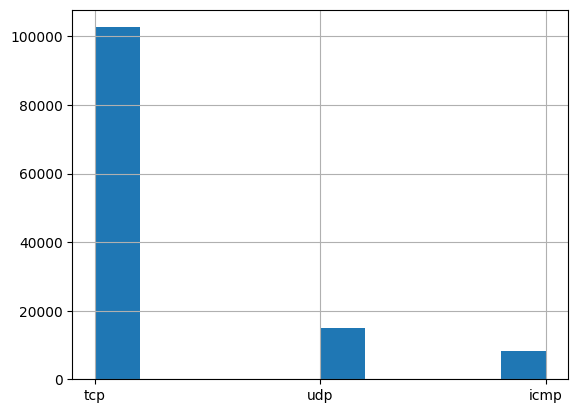

In [43]:
# Comparacion de que Stratify mantiene la proporcion de la caracteristica  en los conjuntos.
%matplotlib inline
import matplotlib.pyplot as plt
df['protocol_type'].hist()
plt.show()

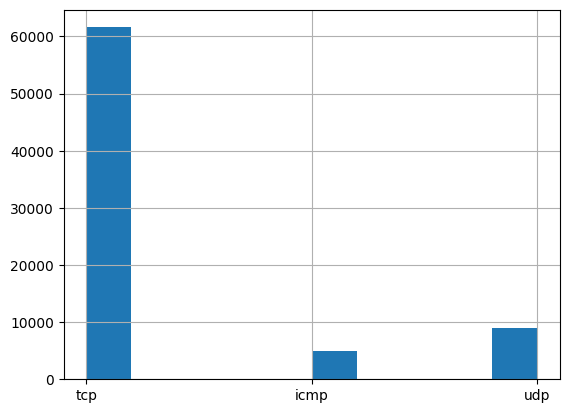

In [44]:
train_set['protocol_type'].hist()
plt.show()

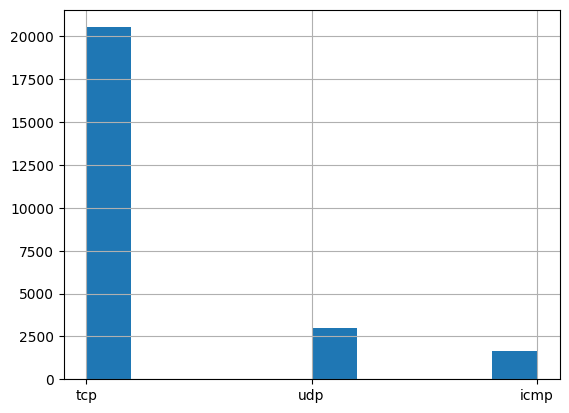

In [45]:
val_set['protocol_type'].hist()
plt.show()

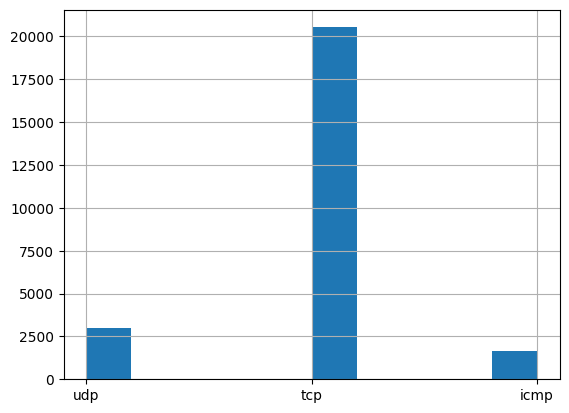

In [46]:
test_set['protocol_type'].hist()
plt.show()